In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from ipywidgets import widgets
from IPython.display import display

# Cardiac beliefs

In [8]:
cardiac_beliefs = widgets.VBox([
    widgets.IntSlider(min= 20, max=120, value=60),
    widgets.IntSlider(min= 0, max=40, value=1)
])

In [9]:
display(
    cardiac_beliefs
)

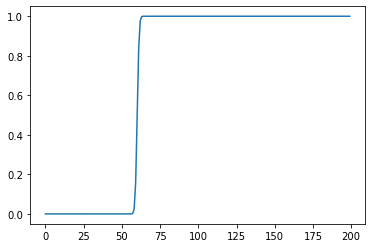

In [17]:
plt.plot(
    norm.cdf(
        np.arange(0, 200, 1), 
        loc=cardiac_beliefs.children[0].value, 
        scale=cardiac_beliefs.children[1].value)
);

# Heart rate

In [18]:
mean_hr = 60
std_hr = 10

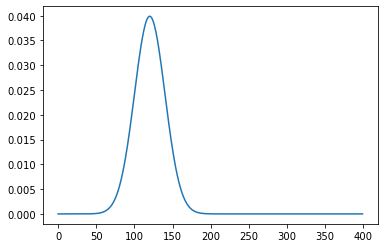

In [19]:
plt.plot(
    norm.pdf(np.arange(0, 200, .5), loc=mean_hr, scale=std_hr)
)

In [20]:
def plot_psi(mean_hr, std_hr, mean_belief, std_belief, n_boot=50000):

    # Sample heart rates
    hr = np.random.normal(loc=mean_hr, scale=std_hr, size=(n_boot, 100))

    # Alpha values being tested
    alphas = np.repeat([np.arange(-50, 50)], n_boot, axis=0)

    # Values of the tones being tested
    tones = hr + alphas

    # Responses provided by the participant
    responses = norm.cdf(tones, loc=mean_belief, scale=std_belief)
    
    # Plot results
    plt.plot(
        np.arange(-50, 50),
        responses.mean(0)
    )
    plt.show()

In [21]:
widgets.interact(plot_psi, mean_hr=(20, 120), std_hr=(.001, 20), mean_belief=(20, 120), std_belief=(.001, 20));

interactive(children=(IntSlider(value=70, description='mean_hr', max=120, min=20), FloatSlider(value=10.000499…

# Bayesian modelling

In [22]:
def data(mean_hr, std_hr, mean_belief, std_belief, n_boot=50000):

    # Sample heart rates
    hr = np.random.normal(loc=mean_hr, scale=std_hr, size=(n_boot, 100))

    # Alpha values being tested
    alphas = np.repeat([np.arange(-50, 50)], n_boot, axis=0)

    # Values of the tones being tested
    tones = hr + alphas

    # Responses provided by the participant
    responses = norm.cdf(tones, loc=mean_belief, scale=std_belief)
    
    return responses.flatten(), hr.flatten(), alphas.flatten(), tones.flatten()

In [23]:
responses, hr, alphas, tones = data(60, 10, 60, 0.001)

In [24]:
import pymc as pm
import aesara.tensor as at

In [25]:
def cumulative_normal(x, alpha, beta):
    """Cumulative distribution function for the standard normal distribution"""
    return 0.5 + 0.5 * at.erf((x - alpha) / (beta * at.sqrt(2)))

In [27]:
with pm.Model():
    mu_heart_rate = pm.Uniform("mu_heart_rate", lower=20.0, upper=120.0)
    sigma_heart_rate = pm.Uniform("sigma_heart_rate", lower=.001, upper=30.0)
    heart_rate = pm.Normal("heart_rate", mu=mu_heart_rate, sigma=sigma_heart_rate, observed=hr)  


AttributeError: __enter__

In [26]:
    mu_alpha = pm.Uniform("mu_alpha", lower=-50.5, upper=50.5)
    sigma_alpha = pm.HalfNormal("sigma_alpha", sigma=100)

    mu_beta = pm.Uniform("mu_beta", lower=0, upper=100)
    sigma_beta = pm.HalfNormal("sigma_beta", sigma=100)

    alpha = pm.Normal("alpha", mu=mu_alpha, sigma=sigma_alpha, shape=nsubj)

    thetaij = pm.Deterministic(
        "thetaij", cumulative_normal(x_total, alpha[sub_total], beta[sub_total])
    )

    rij_ = pm.Binomial("rij", p=thetaij, n=n_total, observed=r_total)

ValueError: No value given for parent tau

In [ ]:
with semantic:
    trace_semantic = pm.sample(
        chains=2, cores=2, tune=1000, draws=1000, return_inferencedata=True
    )